In [23]:
%matplotlib inline
from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt
import numpy as np
#world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

In [24]:
m = Basemap(projection='mill',resolution='c')

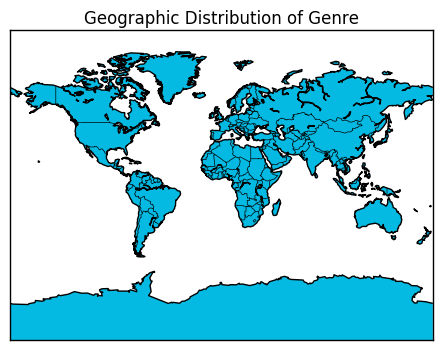

In [32]:
m.drawcoastlines()
#m.drawcountries()
m.fillcontinents(color='#04BAE3',lake_color='#FFFFFF')
m.drawmapboundary(fill_color='#FFFFFF')
m.drawcountries()
m.
#m.bluemarble()
plt.title('Geographic Distribution of Genre')
plt.show()

In [36]:

import plotly.plotly as py
import plotly.graph_objs as go

import pandas as pd
df = pd.read_csv('https://raw.githubusercontent.com/plotly/datasets/master/2014_ebola.csv')
df.head()

cases = []
colors = ['rgb(239,243,255)','rgb(189,215,231)','rgb(107,174,214)','rgb(33,113,181)']
months = {6:'June',7:'July',8:'Aug',9:'Sept'}

for i in range(6,10)[::-1]:
    cases.append(go.Scattergeo(
        lon = df[ df['Month'] == i ]['Lon'], #-(max(range(6,10))-i),
        lat = df[ df['Month'] == i ]['Lat'],
        text = df[ df['Month'] == i ]['Value'],
        name = months[i],
        marker = dict(
            size = df[ df['Month'] == i ]['Value']/50,
            color = colors[i-6],
            line = dict(width = 0)
        ),
    ) )

cases[0]['text'] = df[ df['Month'] == 9 ]['Value'].map('{:.0f}'.format).astype(str)+' '+\
    df[ df['Month'] == 9 ]['Country']
cases[0]['mode'] = 'markers+text'
cases[0]['textposition'] = 'bottom center'

inset = [
    go.Choropleth(
        locationmode = 'country names',
        locations = df[ df['Month'] == 9 ]['Country'],
        z = df[ df['Month'] == 9 ]['Value'],
        text = df[ df['Month'] == 9 ]['Country'],
        colorscale = [[0,'rgb(0, 0, 0)'],[1,'rgb(0, 0, 0)']],
        autocolorscale = False,
        showscale = False,
        geo = 'geo2'
    ),
    go.Scattergeo(
        lon = [21.0936],
        lat = [7.1881],
        text = ['Africa'],
        mode = 'text',
        showlegend = False,
        geo = 'geo2'
    )
]

layout = go.Layout(
    title = 'Ebola cases reported by month in West Africa 2014<br> \
Source: <a href="https://data.hdx.rwlabs.org/dataset/rowca-ebola-cases">\
HDX</a>',
    geo = dict(
        resolution = 50,
        scope = 'africa',
        showframe = False,
        showcoastlines = True,
        showland = True,
        landcolor = "rgb(229, 229, 229)",
        countrycolor = "rgb(255, 255, 255)" ,
        coastlinecolor = "rgb(255, 255, 255)",
        projection = dict(
            type = 'Mercator'
        ),
        lonaxis = dict( range= [ -15.0, -5.0 ] ),
        lataxis = dict( range= [ 0.0, 12.0 ] ),
        domain = dict(
            x = [ 0, 1 ],
            y = [ 0, 1 ]
        )
    ),
    geo2 = dict(
        scope = 'africa',
        showframe = False,
        showland = True,
        landcolor = "rgb(229, 229, 229)",
        showcountries = False,
        domain = dict(
            x = [ 0, 0.6 ],
            y = [ 0, 0.6 ]
        ),
        bgcolor = 'rgba(255, 255, 255, 0.0)',
    ),
    legend = dict(
           traceorder = 'reversed'
    )
)

fig = go.Figure(layout=layout, data=cases+inset)
py.iplot(fig, validate=False, filename='West Africa Ebola cases 2014')


PlotlyLocalCredentialsError: 
Couldn't find a 'username', 'api-key' pair for you on your local machine. To sign in temporarily (until you stop running Python), run:
>>> import plotly.plotly as py
>>> py.sign_in('username', 'api_key')

Even better, save your credentials permanently using the 'tools' module:
>>> import plotly.tools as tls
>>> tls.set_credentials_file(username='username', api_key='api-key')

For more help, see https://plot.ly/python.


<class 'geopandas.geodataframe.GeoDataFrame'>
                       Country     imdbRating
1128                     Spain  867373.000000
3397  United States of America  626571.578000
1591            United Kingdom  618308.111111
683                      China  606642.466667
923                    Germany  520489.166667
2983                    Turkey   65746.800000
171                  Australia   43649.300000
565                     Canada   17999.300000
15        United Arab Emirates   17640.000000
266                    Belgium   13454.500000
1828                     India   11935.400000
2289               South Korea    8900.350000
1737                   Hungary    8784.000000
2195                     Japan    6437.590000
2891                    Sweden    1324.050000
1316                    France    1095.000000
1001                   Denmark     587.500000
2223                Kazakhstan     416.000000
764             Czech Republic     416.000000
2800                    Russia    

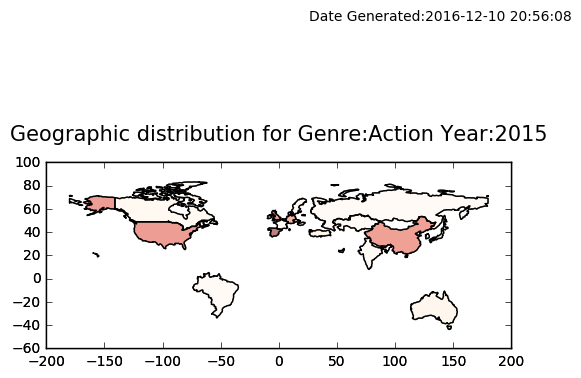

In [117]:
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt
import datetime
import time
df = gpd.read_file('countries.geojson')

fig, ax = plt.subplots()
ax.set_aspect('equal')
print(type(df))



df2=pd.read_csv('Analysis_csvfiles/Geo_year_genredist.csv')

#print(df2.Country.unique)

gen='Action'
Released=2015
df2['Country']=df2['Country'].str.replace('USA','United States of America')
df2['Country']=df2['Country'].str.replace('UK','United Kingdom')
df=df.merge(df2, left_on=['name'], right_on=['Country'], how='left')
#print(df.Country.unique)
df=df[df['Genre']==gen]
df=df[df['Released']==Released]
#print(type(df))
print(df[['Country','imdbRating']].sort_values(by='imdbRating',ascending=0))
#plt.title('Geography Distribution - Genre')
ay=df.plot(ax=ax)
#ay.title('Geography Distribution - Genre')
#plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

ax = plot_dataframe(df, column='imdbRating',  k=3, colormap='OrRd', legend=False)
plt.title('Geographic distribution for Genre:'+str(gen)+' Year:'+str(Released),fontsize=15,y=1.08)
plt.legend(bbox_to_anchor=(1.09, 1), loc=2, borderaxespad=0.)
plt.figtext(1.0, 1.10, 'Date Generated:'+str(datetime.datetime.fromtimestamp(time.time()).strftime('%Y-%m-%d %H:%M:%S')), horizontalalignment='right')
plt.savefig('analysis1_geo_country_rating.png')
#ax = plot_dataframe(df, column='imdbRating',scheme='equal_interval',  k=3, colormap='OrRd', legend=True)

In [50]:
def __pysal_choro(values, scheme, k=5):
    """ Wrapper for choropleth schemes from PySAL for use with plot_dataframe

        Parameters
        ----------

        values
            Series to be plotted

        scheme
            pysal.esda.mapclassify classificatin scheme ['Equal_interval'|'Quantiles'|'Fisher_Jenks']

        k
            number of classes (2 <= k <=9)

        Returns
        -------

        values
            Series with values replaced with class identifier if PySAL is available, otherwise the original values are used
    """

    try:
        from pysal.esda.mapclassify import Quantiles, Equal_Interval, Fisher_Jenks
        schemes = {}
        schemes['equal_interval'] = Equal_Interval
        schemes['quantiles'] = Quantiles
        schemes['fisher_jenks'] = Fisher_Jenks
        s0 = scheme
        scheme = scheme.lower()
        if scheme not in schemes:
            scheme = 'quantiles'
            print('Unrecognized scheme: ', s0)
            print('Using Quantiles instead')
        if k < 2 or k > 9:
            print('Invalid k: ', k)
            print('2<=k<=9, setting k=5 (default)')
            k = 5
        binning = schemes[scheme](values, k)
        values = binning.yb
    except ImportError:
        print('PySAL not installed, setting map to default')

    return binning

In [51]:
# adding linewidth parameter

def plot_polygon(ax, poly, facecolor='red', edgecolor='black', alpha=0.5, linewidth=1):
    """ Plot a single Polygon geometry """
    from descartes.patch import PolygonPatch
    a = np.asarray(poly.exterior)
    # without Descartes, we could make a Patch of exterior
    ax.add_patch(PolygonPatch(poly, facecolor=facecolor, alpha=alpha))
    ax.plot(a[:, 0], a[:, 1], color=edgecolor, linewidth=linewidth)
    for p in poly.interiors:
        x, y = zip(*p.coords)
        ax.plot(x, y, color=edgecolor, linewidth=linewidth)

def plot_multipolygon(ax, geom, facecolor='red', edgecolor='black', alpha=0.5, linewidth=1):
    """ Can safely call with either Polygon or Multipolygon geometry
    """
    if geom.type == 'Polygon':
        plot_polygon(ax, geom, facecolor=facecolor, edgecolor=edgecolor, alpha=alpha, linewidth=linewidth)
    elif geom.type == 'MultiPolygon':
        for poly in geom.geoms:
            plot_polygon(ax, poly, facecolor=facecolor, edgecolor=edgecolor, alpha=alpha, linewidth=linewidth)

In [52]:
import numpy as np
from geopandas.plotting import (plot_linestring, plot_point, norm_cmap)


def plot_dataframe(s, column=None, colormap=None, alpha=0.5,
                   categorical=False, legend=False, axes=None, scheme=None,
                   k=5, linewidth=1):
    """ Plot a GeoDataFrame

        Generate a plot of a GeoDataFrame with matplotlib.  If a
        column is specified, the plot coloring will be based on values
        in that column.  Otherwise, a categorical plot of the
        geometries in the `geometry` column will be generated.

        Parameters
        ----------

        GeoDataFrame
            The GeoDataFrame to be plotted.  Currently Polygon,
            MultiPolygon, LineString, MultiLineString and Point
            geometries can be plotted.

        column : str (default None)
            The name of the column to be plotted.

        categorical : bool (default False)
            If False, colormap will reflect numerical values of the
            column being plotted.  For non-numerical columns (or if
            column=None), this will be set to True.

        colormap : str (default 'Set1')
            The name of a colormap recognized by matplotlib.

        alpha : float (default 0.5)
            Alpha value for polygon fill regions.  Has no effect for
            lines or points.

        legend : bool (default False)
            Plot a legend (Experimental; currently for categorical
            plots only)

        axes : matplotlib.pyplot.Artist (default None)
            axes on which to draw the plot

        scheme : pysal.esda.mapclassify.Map_Classifier
            Choropleth classification schemes

        k   : int (default 5)
            Number of classes (ignored if scheme is None)


        Returns
        -------

        matplotlib axes instance
    """
    import matplotlib.pyplot as plt
    from matplotlib.lines import Line2D
    from matplotlib.colors import Normalize
    from matplotlib import cm

    if column is None:
        return plot_series(s.geometry, colormap=colormap, alpha=alpha, axes=axes)
    else:
        if s[column].dtype is np.dtype('O'):
            categorical = True
        if categorical:
            if colormap is None:
                colormap = 'Set1'
            categories = list(set(s[column].values))
            categories.sort()
            valuemap = dict([(k, v) for (v, k) in enumerate(categories)])
            values = [valuemap[k] for k in s[column]]
        else:
            values = s[column]
        if scheme is not None:
            binning = __pysal_choro(values, scheme, k=k)
            values = binning.yb
            # set categorical to True for creating the legend
            categorical = True
            binedges = [binning.yb.min()] + binning.bins.tolist()
            categories = ['{0:.2f} - {1:.2f}'.format(binedges[i], binedges[i+1]) for i in range(len(binedges)-1)]
        cmap = norm_cmap(values, colormap, Normalize, cm)
        if axes == None:
            fig = plt.gcf()
            fig.add_subplot(111, aspect='equal')
            ax = plt.gca()
        else:
            ax = axes
        for geom, value in zip(s.geometry, values):
            if geom.type == 'Polygon' or geom.type == 'MultiPolygon':
                plot_multipolygon(ax, geom, facecolor=cmap.to_rgba(value), alpha=alpha, linewidth=linewidth)
            elif geom.type == 'LineString' or geom.type == 'MultiLineString':
                plot_multilinestring(ax, geom, color=cmap.to_rgba(value))
            # TODO: color point geometries
            elif geom.type == 'Point':
                plot_point(ax, geom, color=cmap.to_rgba(value))
        if legend:
            if categorical:
                patches = []
                for value, cat in enumerate(categories):
                    patches.append(Line2D([0], [0], linestyle="none",
                                          marker="o", alpha=alpha,
                                          markersize=10, markerfacecolor=cmap.to_rgba(value)))
                ax.legend(patches, categories, numpoints=1, loc='best')
            else:
                # TODO: show a colorbar
                raise NotImplementedError

    plt.draw()
    return ax

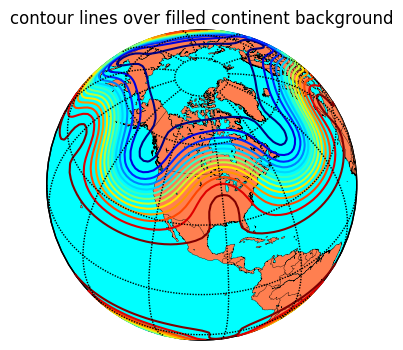

In [27]:
import matplotlib.pyplot as plt
import numpy as np
# set up orthographic map projection with
# perspective of satellite looking down at 50N, 100W.
# use low resolution coastlines.
map = Basemap(projection='ortho',lat_0=45,lon_0=-100,resolution='l')
# draw coastlines, country boundaries, fill continents.
map.drawcoastlines(linewidth=0.25)
map.drawcountries(linewidth=0.25)
map.fillcontinents(color='coral',lake_color='aqua')
# draw the edge of the map projection region (the projection limb)
map.drawmapboundary(fill_color='aqua')
# draw lat/lon grid lines every 30 degrees.
map.drawmeridians(np.arange(0,360,30))
map.drawparallels(np.arange(-90,90,30))
# make up some data on a regular lat/lon grid.
nlats = 73; nlons = 145; delta = 2.*np.pi/(nlons-1)
lats = (0.5*np.pi-delta*np.indices((nlats,nlons))[0,:,:])
lons = (delta*np.indices((nlats,nlons))[1,:,:])
wave = 0.75*(np.sin(2.*lats)**8*np.cos(4.*lons))
mean = 0.5*np.cos(2.*lats)*((np.sin(2.*lats))**2 + 2.)
# compute native map projection coordinates of lat/lon grid.
x, y = map(lons*180./np.pi, lats*180./np.pi)
# contour data over the map.
cs = map.contour(x,y,wave+mean,15,linewidths=1.5)
plt.title('contour lines over filled continent background')
plt.show()